# PROJECT - ZOMATO API - II , PIYUSH PRAVIN

# Solution 1

# 1.1

Location  	      |   No. of Restaurants
-------------------------------------------
Delhi-NCR             |       7947
Rest Of India         |        705


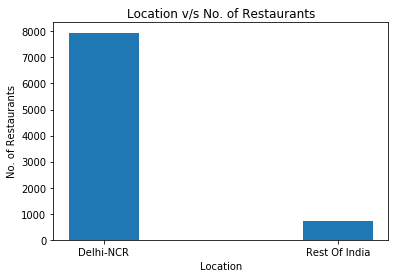

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#reading csv data
d = pd.read_csv("zomato.csv", encoding="latin-1")

#copying data
df = d.copy()

#getting data of India
df = df[df["Country Code"]==1]

city_dict = {}
city = df["City"].value_counts().index
num = df["City"].value_counts().values

#getting details of cities as per Delhi-NCR and rest of India
for i in range(len(city)):
    if city[i]=="New Delhi" or city[i]=="Ghaziabad" or city[i]=="Noida" or city[i]=="Gurgaon" or city[i]=="Faridabad":
        city_dict["Delhi-NCR"] = city_dict.get("Delhi-NCR",0) + num[i]
    else:
        city_dict["Rest Of India"] = city_dict.get("Rest Of India",0) + num[i]

res_loc = ["Delhi-NCR","Rest Of India"]
res_num = [city_dict["Delhi-NCR"],city_dict["Rest Of India"]]

#printing the output
print("Location  \t      |   No. of Restaurants")
print("-------------------------------------------")
for i in range(len(res_loc)):
    print('{:<22s}|{:>11d}'.format(res_loc[i],res_num[i]))

#plotting
plt.bar(res_loc,res_num,width=0.3)
plt.xlabel("Location")
plt.ylabel("No. of Restaurants")
plt.title("Location v/s No. of Restaurants")
plt.show()
           

# 1.2

In [144]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#reading the csv data
d = pd.read_csv("zomato.csv", encoding="latin-1")
#copying the data
df = d.copy()
#getting data of India
df = df[df["Country Code"]==1]

#creating numpy array for cities and cuisines
cities = np.array(df["City"])
cuisines = np.array(df["Cuisines"])

#getting sets to avoid duplicates
ncr = set()
roi = set()
for i in range(len(cities)):
    if cities[i]=="New Delhi" or cities[i]=="Ghaziabad" or cities[i]=="Noida" or cities[i]=="Gurgaon" or cities[i]=="Faridabad":
        for cui in cuisines[i].split(", "):
            ncr.add(cui)
    else:
        for cui in cuisines[i].split(", "):
            roi.add(cui)
not_in_delhi_ncr = []    
#printing the results
for i in roi:
    if i not in ncr:
        not_in_delhi_ncr.append(i)
        print(i)
        


Cajun
German
BBQ
Malwani


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

d = pd.read_csv("zomato.csv", encoding="latin-1")

df = d.copy()

data_india = df[df["Country Code"]==1]
cities = np.array(data_india["City"])
cuisines= np.array(data_india["Cuisines"])
ncr = set()
roi = set()
for i in range(len(cities)):
    if cities[i]=="New Delhi" or cities[i]=="Ghaziabad" or cities[i]=="Noida" or cities[i]=="Gurgaon" or cities[i]=="Faridabad":
        for cui in cuisines[i].split(", "):
            ncr.add(cui)
    else:
        for cui in cuisines[i].split(", "):
            roi.add(cui)
print(roi - ncr)

{'Malwani', 'BBQ', 'German', 'Cajun'}


#### Cheking with zomato API

In [146]:
# key : #########################################
import requests
import json
params={"user-key":"###################################", "city_id":1}
headers={"accept":"application/json", "user-key":"#################################"}
response=requests.get('https://developers.zomato.com/api/v2.1/cuisines', params=params, headers=headers)
data=response.json()

cuisines_from_api_in_delhi=[]

for i in data['cuisines']:
    cuisines_from_api_in_delhi.append(i['cuisine']['cuisine_name'])
    
cuisines_from_api_in_delhi=set(cuisines_from_api_in_delhi)

for i in cuisines_from_api_in_delhi:
    if i in not_in_delhi_ncr:
        print(i)

BBQ
Malwani


# 1.3

TOP 10 CUISINES IN Delhi-NCR
-----------------------------
North Indian          |       3597
Chinese               |       2448
Fast Food             |       1866
Mughlai               |        933
Bakery                |        697
South Indian          |        569
Continental           |        547
Desserts              |        542
Street Food           |        538
Italian               |        535

TOP 10 CUISINES IN Rest of India
-----------------------------
North Indian          |        349
Chinese               |        242
Continental           |        177
Italian               |        147
Cafe                  |        136
Fast Food             |         97
South Indian          |         62
Mughlai               |         59
Desserts              |         55
Mexican               |         50


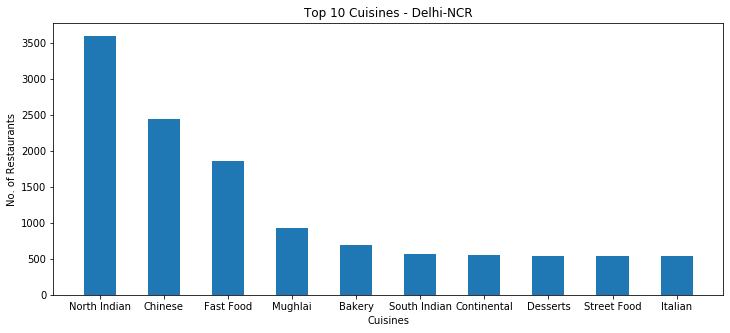

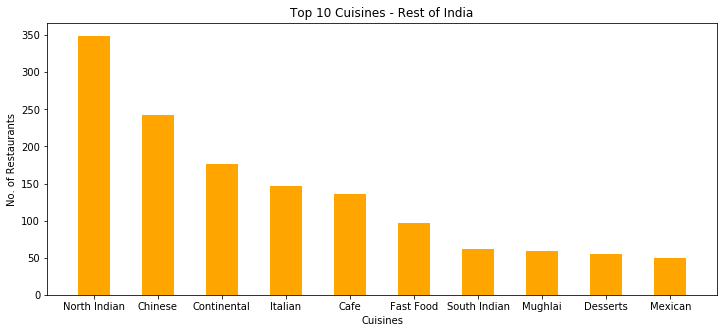

In [165]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#readin csv data
d = pd.read_csv("zomato.csv", encoding="latin-1")
#copying data
df = d.copy()
#getting data of India
df = df[df["Country Code"]==1]
#creating numpy array for cities and cuisines
cities = np.array(df["City"])
cuisines = np.array(df["Cuisines"])


ncr = {}
roi = {}
for i in range(len(cities)):
    if cities[i]=="New Delhi" or cities[i]=="Ghaziabad" or cities[i]=="Noida" or cities[i]=="Gurgaon" or cities[i]=="Faridabad":
        for cui in cuisines[i].split(", "):
            ncr[cui] = ncr.get(cui,0) + 1
    else:
        for cui in cuisines[i].split(", "):
            roi[cui] = roi.get(cui,0) + 1
            
#creating dictionary for cuisines in ncr and number of restaurants
ncr_cui = []
ncr_num = []
print("TOP 10 CUISINES IN Delhi-NCR")
print("-----------------------------")
for i in range(1,11):
    m=max(ncr.values())
    for j in ncr:
        if ncr[j]==m:
            ncr_cui.append(j)
            ncr_num.append(ncr[j])
            break
    del ncr[j]
for i in range(len(ncr_cui)):
    print('{:<22s}|{:>11d}'.format(ncr_cui[i],ncr_num[i]))    
print()

#creating dictionary for cuisines in rest of India and number of restaurants
roi_cui = []
roi_num = []
print("TOP 10 CUISINES IN Rest of India")
print("-----------------------------")
for i in range(1,11):
    m=max(roi.values())
    for j in roi:
        if roi[j]==m:
            roi_cui.append(j)
            roi_num.append(roi[j])
            break
    del roi[j]
for i in range(len(roi_cui)):
    print('{:<22s}|{:>11d}'.format(roi_cui[i],roi_num[i]))
 

 #plotting
plt.subplots(figsize=(12,5))
plt.bar(ncr_cui,ncr_num,width=0.5)
plt.xlabel("Cuisines")
plt.ylabel("No. of Restaurants")
plt.title("Top 10 Cuisines - Delhi-NCR")
plt.show()

plt.subplots(figsize=(12,5))
plt.bar(roi_cui,roi_num,width=0.5,color="orange")
plt.xlabel("Cuisines")
plt.ylabel("No. of Restaurants")
plt.title("Top 10 Cuisines - Rest of India")
plt.show()


# 1.4

### 1st graph for top 10 cuisines served maximum number of times in Delhi NCR and 2nd for top 10 cuisines served maximum number of time in Rest of India.
### North Indian is at top position in both and Chinese is at 2nd position. And at 3rd position there is Fast food in Delhi NCR and Continental in India.
### And most of the cuisines are same but the order is change.
### Mughlai is at 4th position in Delhi NCR and fall down 8th position in Rest of India.
### And most of the cuisines are same but the order is change.

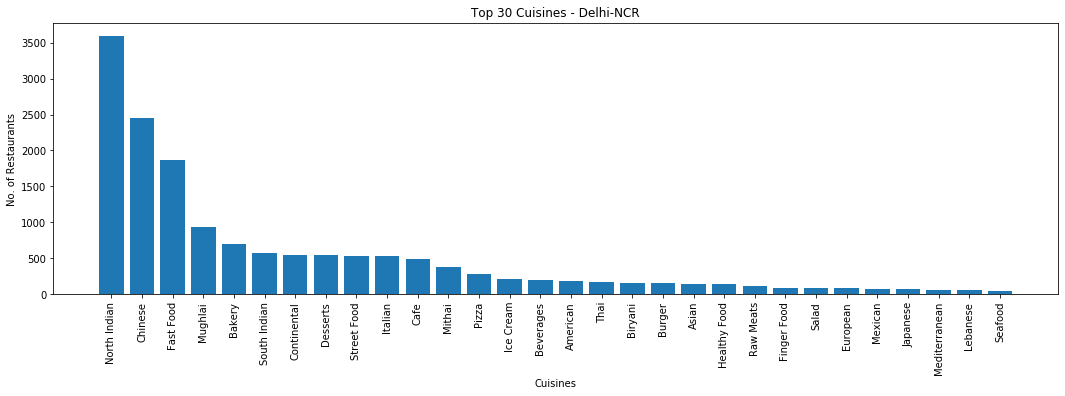

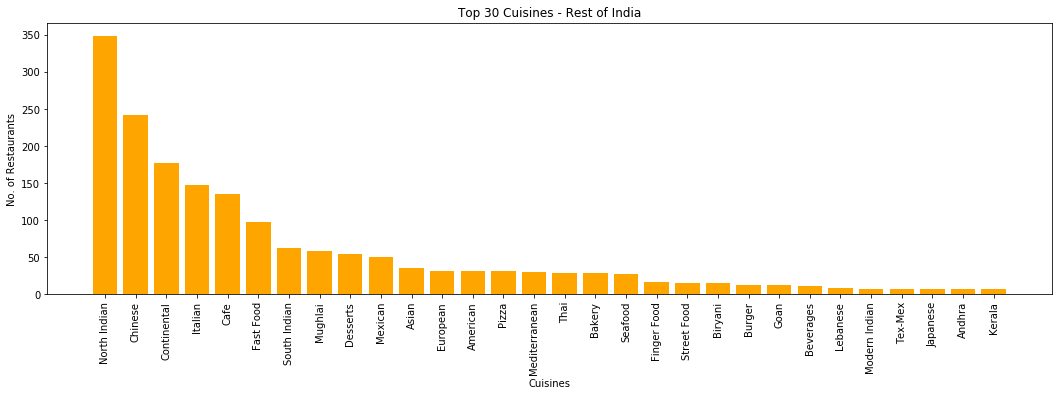

In [164]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#reading csv data
d = pd.read_csv("zomato.csv", encoding="latin-1")

#copying data
df = d.copy()

#getting data of India
df = df[df["Country Code"]==1]

#creating numpy arrays for cities and cuisines
cities = np.array(df["City"])
cuisines = np.array(df["Cuisines"])


ncr = {}
roi = {}

for i in range(len(cities)):
    if cities[i]=="New Delhi" or cities[i]=="Ghaziabad" or cities[i]=="Noida" or cities[i]=="Gurgaon" or cities[i]=="Faridabad":
        for cui in cuisines[i].split(", "):
            ncr[cui] = ncr.get(cui,0) + 1
    else:
        for cui in cuisines[i].split(", "):
            roi[cui] = roi.get(cui,0) + 1

ncr_cui = []
ncr_num = []

for i in range(30):
    m=max(ncr.values())
    for j in ncr:
        if ncr[j]==m:
            ncr_cui.append(j)
            ncr_num.append(ncr[j])
            break
    del ncr[j]

roi_cui = []
roi_num = []

for i in range(30):
    m=max(roi.values())
    for j in roi:
        if roi[j]==m:
            roi_cui.append(j)
            roi_num.append(roi[j])
            break
    del roi[j]
 

 #plotting
plt.subplots(figsize=(18,5))
plt.bar(ncr_cui,ncr_num,width=0.8,)
plt.xlabel("Cuisines")
plt.xticks(rotation=90)
plt.ylabel("No. of Restaurants")
plt.title("Top 30 Cuisines - Delhi-NCR")
plt.show()

plt.subplots(figsize=(18,5))
plt.bar(roi_cui,roi_num,width=0.8,color="orange")
plt.xlabel("Cuisines")
plt.xticks(rotation=90)
plt.ylabel("No. of Restaurants")
plt.title("Top 30 Cuisines - Rest of India")
plt.show()


#### Analysis

From the above graph we can infer that "North Indian" cusinie is the most popular among restaurants of Delhi_NCR as well as other states. Here I have plotted only those 30 important cusinies which are common in both Delhi-NCR and other states. There are some cusinies present in other states and are not present in any restaurant of Delhi-NCR. After North Indian cusinie we have chinese cusinie with 2448 restaurants in Delhi-NCR and 242 in other states of india. After these two we have fast food with 1866 restaurants in Delhi_NCR and 97 in other states(a huge difference). After this we have Mughlai cusinie in Delhi-NCR with 933 restaurants and 59 in the states other than Delhi-NCR. and there are many more cusinies as show in the graph.

# Solution 2

# 2.1.1

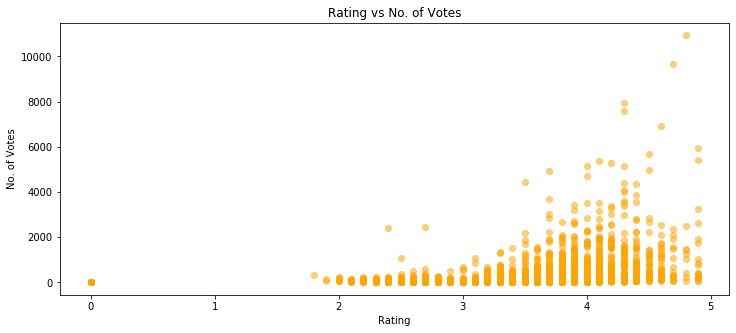

In [171]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#reading csv data
d = pd.read_csv("zomato.csv", encoding="latin-1")

#copying data
df = d.copy()

#getting data of India
df = df[df["Country Code"]==1]

rating = np.array(df["Aggregate rating"])
votes = np.array(df["Votes"])

plt.subplots(figsize=(12,5))
plt.scatter(rating,votes,alpha=0.5,c="orange")
plt.xlabel("Rating")
plt.ylabel("No. of Votes")
plt.title("Rating vs No. of Votes")
plt.show()

#### Analysis
Clearly as the number of votes increases the chances of getting higher ratings also increases. It is clear from the graph that any restaurants with more than 5000 votes get ratings between 4 and 5. when the voes are less than 2000, there is a diversity of ratings, which varies from 2 to 5. so for a restaurant to have a probability of getting higher aggregate rating, it should have more than 5000 votes. Also there are many restaurants having votes between between 1000 and 2000 with very good ratings, that is between 4 and 5.

# 2.1.2

No of cuisines served |   No. of restaurants serving given number of cuisines
-----------------------------------------------------------------------------
2                     |       3144
1                     |       3097
3                     |       1596
4                     |        552
5                     |        155
6                     |         70
7                     |         26
8                     |         12


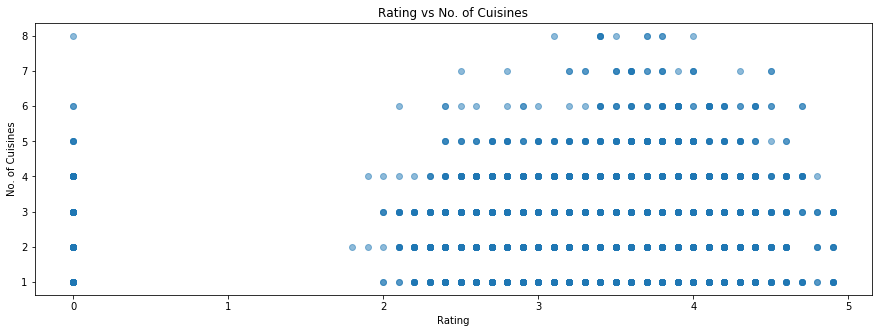

In [181]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#reading csv data
d = pd.read_csv("zomato.csv", encoding="latin-1")

#copying data
df = d.copy()

#getting data of India
df = df[df["Country Code"]==1]

cuisines = df["Cuisines"].values
cuisines_num = []
for i in cuisines:
    cuisines_num.append(len(i.split(", ")))
df["num_cuisines"] = cuisines_num

rating = np.array(df["Aggregate rating"],dtype=float)
num_cuisine = np.array(df["num_cuisines"])

num_dict={}
for i in num_cuisine:
    num_dict[i] = num_dict.get(i,0)+1
print("No of cuisines served |   No. of restaurants serving given number of cuisines")
print("-----------------------------------------------------------------------------")    
for i in num_dict.keys():
    print('{:<22d}|{:>11d}'.format(i,num_dict[i]))
    
plt.subplots(figsize=(15,5))
plt.scatter(rating,num_cuisine, alpha=0.5)
plt.xlabel("Rating")
plt.ylabel("No. of Cuisines")
plt.title("Rating vs No. of Cuisines")
plt.show()


#### Analysis
From the graph itself, it is clear that when the number of cuisines provided increases from 3 to 8, generally the rating seems to converge between 3 and 4. restaurants providing more number of cuisines are not much likely to get higher ratings, specially when the number of cuisines provided exceeds 6. while if the restaurants provide less number of cuisines, for example 1 or 2 cuisines, they are more likely to get higher ratings. Infact many restaurants in india are providing 2 cuisines. there is a very less number of restaurants providing 8 cuisines. it seems like when a restaurant provides too many cuisines, its focus on the quality of food offered diverges. while restaurants providing less cuisines focus on the quality of food to get good aggregate ratings.

# 2.1.3

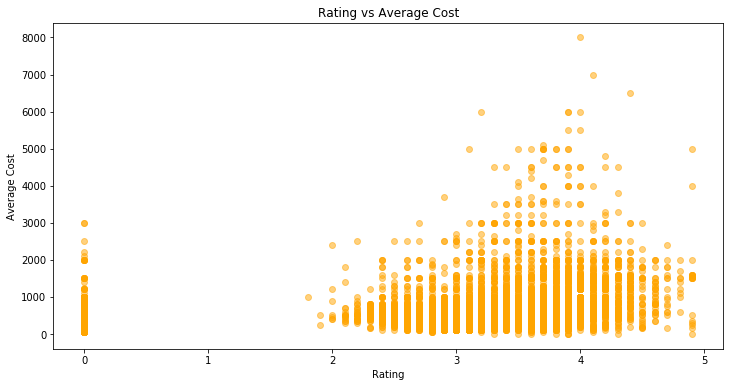

In [183]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#reading csv data
d = pd.read_csv("zomato.csv", encoding="latin-1")

#copying data
df = d.copy()

#getting data of India
df = df[df["Country Code"]==1]

rating = np.array(df["Aggregate rating"])
avg_cost = np.array(df["Average Cost for two"])

plt.subplots(figsize=(12,6))
plt.scatter(rating,avg_cost,c="orange",alpha=0.5)
plt.xlabel("Rating")
plt.ylabel("Average Cost")
plt.title("Rating vs Average Cost")
plt.show()

#### Analysis
As the average cost goes in between 2000, to 6000, it seems like the food is not worth the money because in that case the average rating is generally between 3 and 4. whereas when the average cost is between 1000 to 2000, the rating varies from 3 to 4.5 mostly. But for the higher price ranges the rating is between 3 and 4

# 2.1.4 

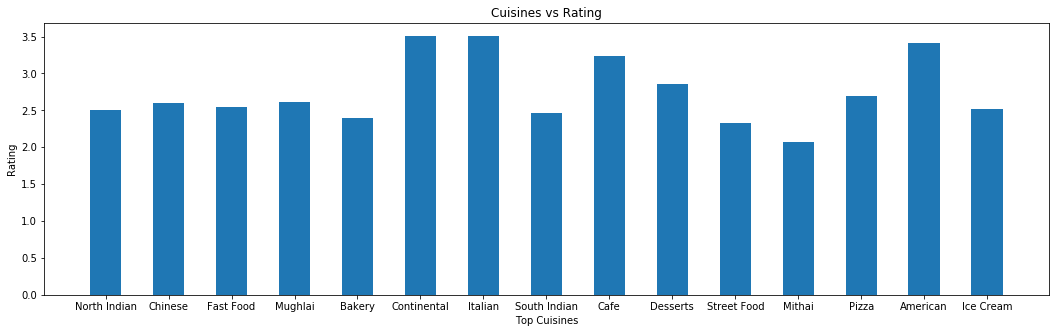

In [200]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#reading csv data
d = pd.read_csv("zomato.csv", encoding="latin-1")

#copying data
df = d.copy()

#getting data of India
df = df[df["Country Code"]==1]

rating = np.array(df["Aggregate rating"])
cuisines = np.array(df["Cuisines"])

cui_dict = {}

for i in range(len(cuisines)):
    for cui in cuisines[i].split(", "):
        cui_dict[cui] = cui_dict.get(cui,0) + 1
        
top_cuisines = []
for i in range(15):
    m=max(cui_dict.values())
    for j in cui_dict:
        if cui_dict[j]==m:
            top_cuisines.append(j)
            break
    del cui_dict[j]    
    
avg_rating = []    
for i in top_cuisines:
    sum=0
    count=0
    for j in range(len(rating)):
        if i in cuisines[j]:
            sum += rating[j]
            count+=1
    avg_rating.append(sum/count)
    
    
plt.subplots(figsize=(18,5))
plt.bar(top_cuisines,avg_rating,width=0.5)
plt.xlabel("Top Cuisines")
plt.ylabel("Rating")
plt.title("Cuisines vs Rating")
plt.show()

#### Analysis
These are top 15 cuisines that served maximum number of time all the restaurant.
Calculated average rating for top cuisines and most of the cuisines having good average rating and American cuisines is at top.
From above graph we can see restaturant serving Cuisine 'Italian','Continental','American' have more average rating compared to other cuisine

# 2.2

Connaught Place
Rajouri Garden
Shahdara
Defence Colony
Pitampura
Malviya Nagar
Mayur Vihar Phase 1
Rajinder Nagar
Safdarjung
Satyaniketan


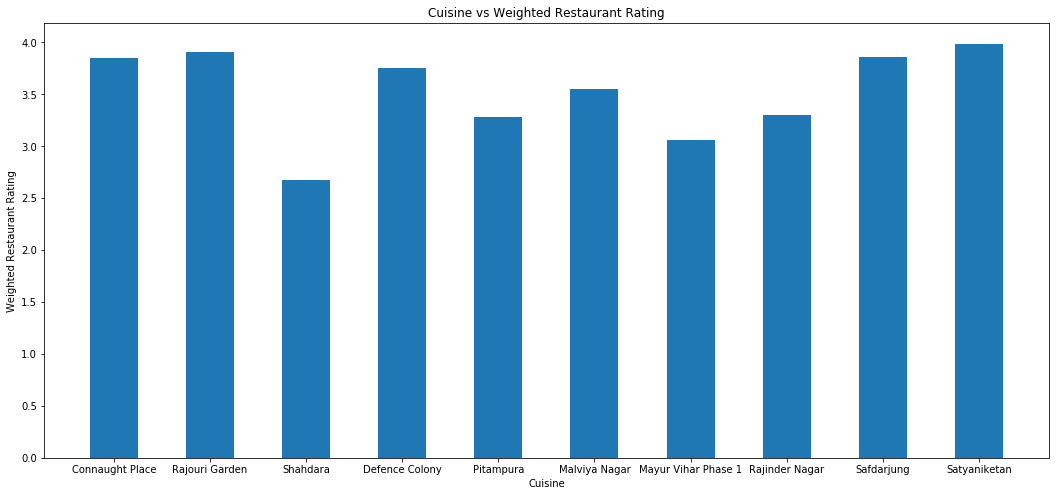

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#reading csv data
d = pd.read_csv("zomato.csv", encoding="latin-1")

#copying data
df = d.copy()

df = df[df["Country Code"]==1]


data=list(zip(df['Locality'],df['Aggregate rating'],df['Votes']))
index=0
values=df['Locality'].value_counts().values
for i in range(len(values)):
    if values[i]<50:
        index=i-1
        break
locality_list=df['Locality'].value_counts().index[0:index]
weightage_rating=[]
for locality in locality_list:
    NRate=0
    Tvote=0
    for i in range(len(data)):
        if locality in data[i][0]:
            NRate=NRate+(data[i][1]*data[i][2])
            Tvote=Tvote+data[i][2]
    if Tvote!=0:       
        weightage_rating.append(NRate/Tvote) 
    else:
        weightage_rating.append(0)
        
for i in locality_list[0:10]:
    print(i)
plt.figure(figsize=(18, 8))
plt.bar(locality_list[0:10],weightage_rating[0:10],width=0.5)
plt.xlabel("Cuisine")
plt.ylabel("Weighted Restaurant Rating")
plt.title("Cuisine vs Weighted Restaurant Rating")
plt.show()

In [8]:
locality_list

Index(['Connaught Place', 'Rajouri Garden', 'Shahdara', 'Defence Colony',
       'Pitampura', 'Malviya Nagar', 'Mayur Vihar Phase 1', 'Rajinder Nagar',
       'Safdarjung', 'Satyaniketan', 'Krishna Nagar', 'Karol Bagh',
       'Sector 62', 'Sector 18', 'Hauz Khas', 'Kalkaji', 'Sector 15',
       'DLF Phase 3', 'Mahipalpur', 'Mukherjee Nagar', 'Shalimar Bagh',
       'Chandni Chowk', 'Greater Kailash (GK) 2', 'Greater Kailash (GK) 1',
       'Delhi University-GTB Nagar', 'Kamla Nagar', 'Paharganj', 'MG Road',
       'Vasundhara Enclave', 'Jail Road', 'Tilak Nagar', 'Sector 72', 'Palam',
       'Punjabi Bagh', 'Najafgarh', 'Vikaspuri', 'Sector 56', 'Uttam Nagar',
       'Laxmi Nagar', 'Dilshad Garden', 'Jangpura', 'Paschim Vihar',
       'East of Kailash', 'Kirti Nagar', 'Naraina', 'Sector 110', 'Sector 14',
       'Sector 31', 'Subhash Nagar'],
      dtype='object')

# Solution 3

# 3.1

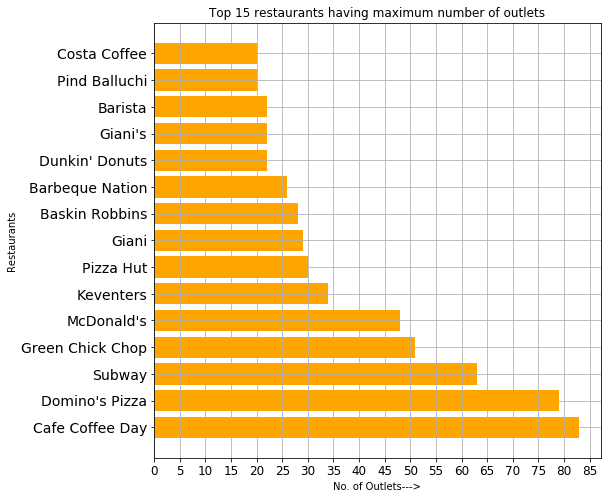

In [238]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#reading csv data
d = pd.read_csv("zomato.csv", encoding="latin-1")

#copying data
df = d.copy()

res_dict = {}
#created a dictionary which will contain the frequencies of all the restaurants
for i in df['Restaurant Name']:
    if i in res_dict.keys():
        res_dict[i]+=1
    else:
        res_dict[i]=1
        
res = []
res_num = []
for i in range(15):
    m=max(res_dict.values())
    for j in res_dict:
        if res_dict[j]==m:
            res.append(j)
            res_num.append(res_dict[j])
            break
    del res_dict[j]
    
plt.figure(figsize=(8, 8))
plt.barh(res, res_num, color='orange')
plt.grid()
plt.ylabel('Restaurants')
plt.xlabel('No. of Outlets--->')
plt.title('Top 15 restaurants having maximum number of outlets')
plt.xticks(np.arange(0, 90, 5), size=12)
plt.yticks(size=14)
plt.show()

# 3.2

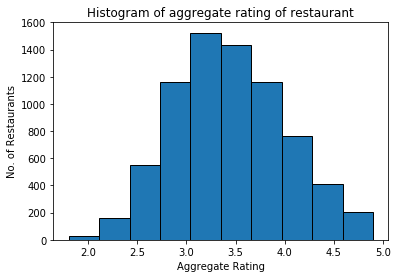

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#reading csv data
d = pd.read_csv("zomato.csv", encoding="latin-1")

#copying data
df = d.copy()

#plotting
df=df[df['Aggregate rating']!=0]
plt.hist(df['Aggregate rating'].values,bins=10,edgecolor='black')
plt.title("Histogram of aggregate rating of restaurant")
plt.xlabel("Aggregate Rating")
plt.ylabel("No. of Restaurants")
plt.show()

# 3.3

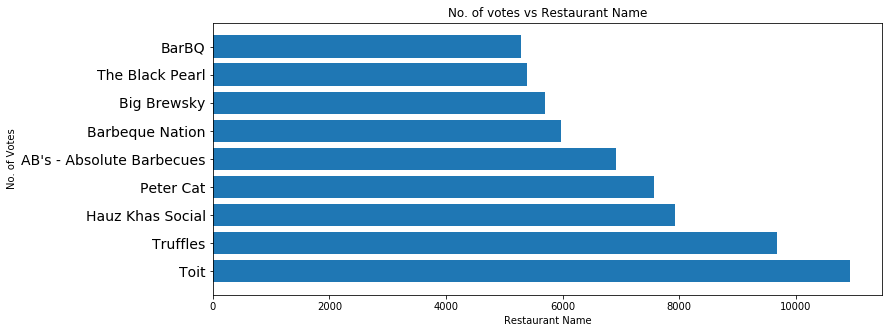

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#reading csv data
d = pd.read_csv("zomato.csv", encoding="latin-1")

#copying data
df = d.copy()


max_votes=df.Votes.sort_values(ascending=False).head(10).values
res_name = []
for i in range(len(max_votes)):
    res_name.append(df[df["Votes"]==max_votes[i]]["Restaurant Name"].values[0])

#plotting
plt.subplots(figsize=(12,5))
plt.barh(res_name,max_votes)
plt.xlabel("Restaurant Name")
plt.ylabel("No. of Votes")
plt.yticks(size=14)
plt.title("No. of votes vs Restaurant Name")
plt.show()

# 3.4

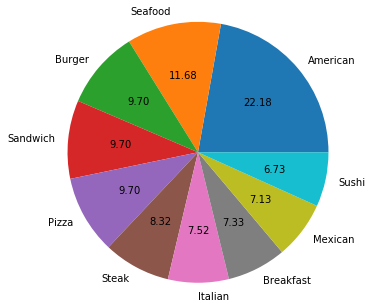

In [302]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#reading csv data
d = pd.read_csv("zomato.csv", encoding="latin-1")

#copying data
df = d.copy()

#getting data of USA
df = df[df["Country Code"]==216]

df["Cuisines"].dropna(inplace=True)
cuisines = np.array(df["Cuisines"])


d = {}
for i in range(len(cuisines)):
    for cui in cuisines[i].split(", "):
        d[cui] = d.get(cui,0) + 1
top_cui=[]
num=[]
for i in range(10):
    m=max(d.values())
    for j in d:
        if d[j]==m:
            top_cui.append(j)
            num.append(d[j])
            break
    del d[j]

#plotting
plt.pie(num, labels=top_cui, radius=1.5, autopct='%.2f')
plt.show()

# 3.5 

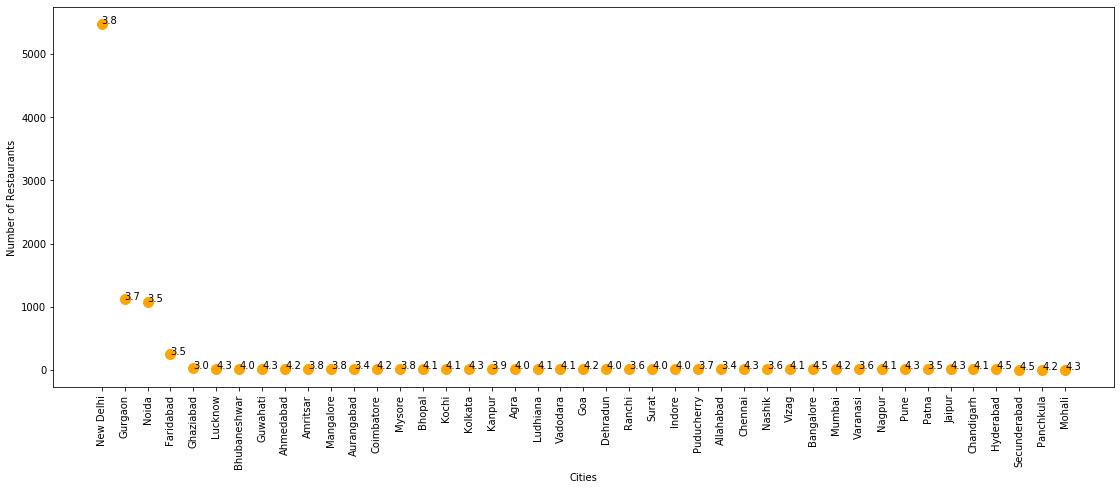

In [326]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#reading csv data
d = pd.read_csv("zomato.csv", encoding="latin-1")

#copying data
df = d.copy()

locality=[]
ef=df[df['Country Code']==1] # India country data
new=ef.City.value_counts() #city value counts
Weighted_Restaurant_Rating=[]

res_name=new.index # city name as index

no_of_res=new.values #city count as a value
for i in res_name:
    locality.append(i)
    tf=df[df.City==i]
    af=tf.copy()
    af['new_col']=tf['Votes']*tf['Aggregate rating'] #adding new column in data frame 
    total=af.new_col.sum() #sum of all col data
    count=af.Votes.sum() #sum of votes 
    weighted=total/count #weighted restaurant rating for each
    Weighted_Restaurant_Rating.append(weighted)
Weighted_Restaurant_Rating = [ round(elem, 1) for elem in Weighted_Restaurant_Rating]#round of the value of Weighted_Restaurant_Rating
#Plotting Graph
plt.subplots(figsize=(19,7))
plt.scatter(res_name,no_of_res,s=100,color='orange')
plt.xlabel('Cities')
plt.ylabel('Number of Restaurants')
plt.xticks(rotation=90)
#pltting the value in th graph.
for i in range(len(Weighted_Restaurant_Rating)):
    plt.text(res_name[i],no_of_res[i],Weighted_Restaurant_Rating[i]) #text value in graph.
plt.show()

In [ ]:
i=1
while i<=n:
    pass
    i+=1

for i in range(1,n+1):
    pass